In [11]:
import os
from pathlib import Path
import re
from matplotlib import pyplot as plt  
import json
import numpy as np
import networkx as nx
import sys
sys.path.append('..')
sys.path.append('C:/tyb_file/tyb_tasks/pathlet/code/utils')
print(sys.path)
from utils import *
import pandas as pd
path_num 
matrix_size 

['C:\\Users\\唐元博', 'C:\\anaconda\\envs\\py38\\python38.zip', 'C:\\anaconda\\envs\\py38\\DLLs', 'C:\\anaconda\\envs\\py38\\lib', 'C:\\anaconda\\envs\\py38', '', 'C:\\anaconda\\envs\\py38\\lib\\site-packages', 'C:\\anaconda\\envs\\py38\\lib\\site-packages\\win32', 'C:\\anaconda\\envs\\py38\\lib\\site-packages\\win32\\lib', 'C:\\anaconda\\envs\\py38\\lib\\site-packages\\Pythonwin', '..', '..', '..', '..', '../utils', '..', '../utils', '..', '../utils', '..', '../utils', '..', '../utils', '..', 'C:\tyb_file\tyb_tasks\\pathlet\\code/utils', '..', 'C:/tyb_file/tyb_tasks/pathlet/code/utils']


5

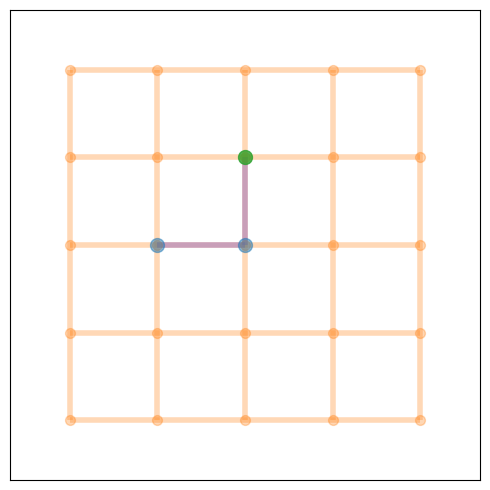

In [34]:
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.margins(0.11)
G = nx.grid_2d_graph(matrix_size, matrix_size)
pos = dict( (n, n) for n in G.nodes() )
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.31, node_color="tab:orange")
nx.draw_networkx_edges(G, pos,  width=4, alpha=0.3, edge_color="tab:orange")
# for i in range(matrix_size):
#     for j in range(matrix_size):
#         nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i,j)], node_color="tab:green")
#         nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i+matrix_size*2,j)], node_color="tab:blue")
#         nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i+matrix_size*4,j)], node_color="tab:green")
tra=[(1, 2),(2, 2),(3, 2)]
# for i in range(len(tra)-1):
#     nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:blue")
#     nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
# nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:green")
tra=[(1, 2),(2, 2),( 2,3)]
for i in range(len(tra)-1):
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:purple")
    nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:green")

plt.tight_layout()
# plt.axis("off")
plt.show()

[(3, 4), (4, 4), (4, 3), (4, 2)]
[(3, 4), (4, 4), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (11, 3), (12, 3), (12, 4)]
[(2, 0), (2, 1), (2, 2), (3, 2), (4, 2)]
[(2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (11, 1), (12, 1), (13, 1), (14, 1), (14, 0)]
[(4, 1), (4, 2)]
[(4, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2)]
[(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2)]
[(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (10, 3)]
[(0, 4), (1, 4), (1, 3), (2, 3), (2, 2), (3, 2), (4, 2)]
[(0, 4), (1, 4), (1, 3), (2, 3), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (10, 1), (11, 1), (12, 1), (12, 0), (13, 0)]
[(3, 2), (4, 2)]
[(3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (11, 1), (11, 0)]
[(2, 2), (3, 2), (4, 2)]
[(2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), 

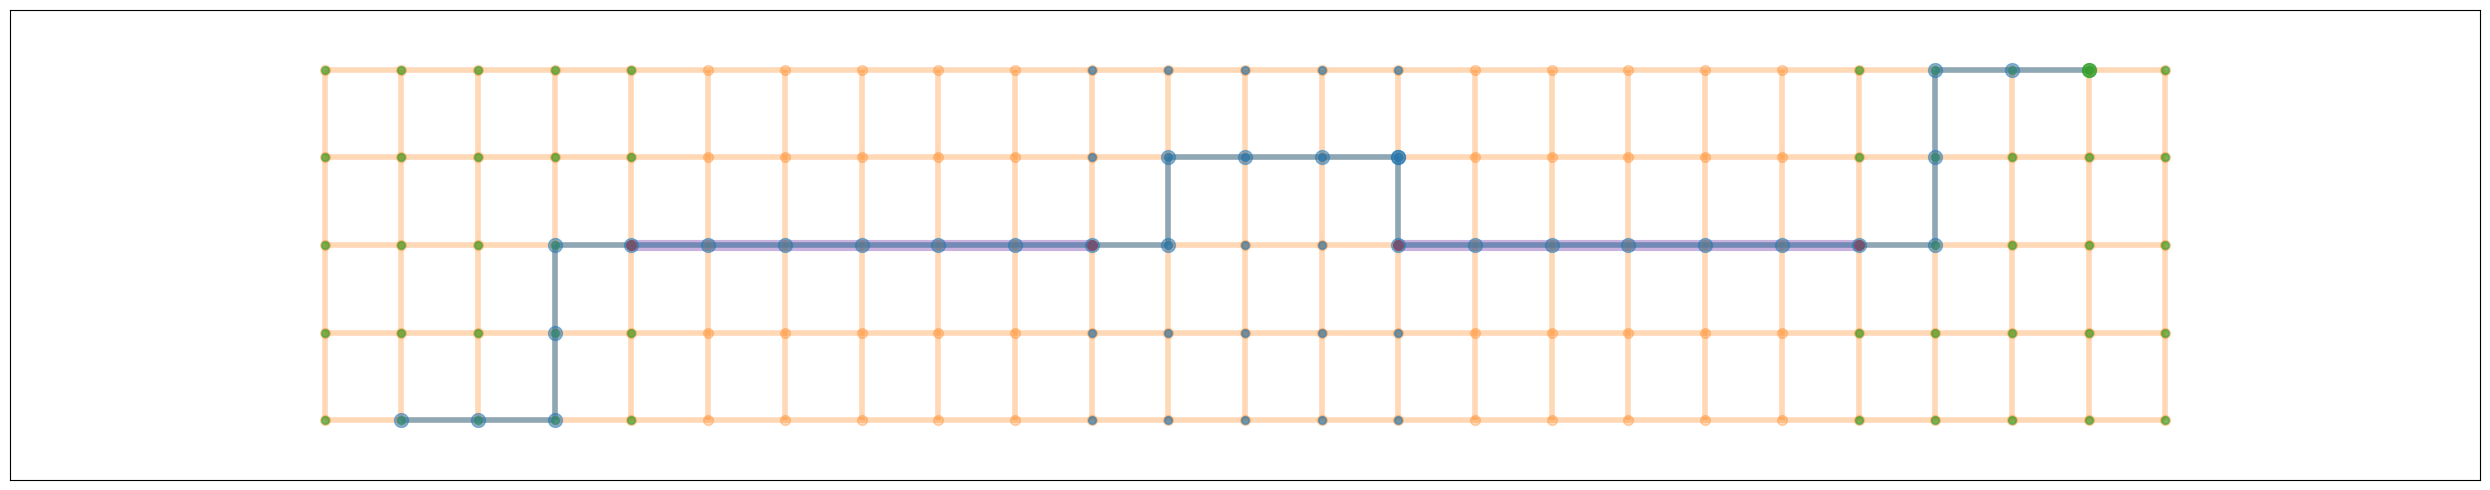

In [12]:
# 这个部分模拟在两个城市中有一条高速公路的场景，A城市想要到 B城市去则必然经过高速公路，
# 在这样的setting下，高速公路一定会成为dictionary中最为重要的一个元素
# 2022年8月30日 目前这是三个城市 两条高速公路（将高速公路从原来的edge=1变成了真实len）
# 首先我们构建初始路网
plt.figure(figsize=(25, 5))
ax = plt.gca()
ax.margins(0.11)
G = nx.grid_2d_graph(matrix_size*5, matrix_size)
pos = dict( (n, n) for n in G.nodes() )
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.3, node_color="tab:orange")
nx.draw_networkx_edges(G, pos, alpha=0.3, width=4, edge_color="tab:orange")
# 画出所有的起点和终点
startpoint_of_highspeedway=[(matrix_size-1,matrix_size//2),(3*matrix_size-1,matrix_size//2)]
endpoint_of_highspeedway=[(matrix_size*2,matrix_size//2),(matrix_size*4,matrix_size//2)]
for i in range(matrix_size):
    for j in range(matrix_size):
        nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i,j)], node_color="tab:green")
        nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i+matrix_size*2,j)], node_color="tab:blue")
        nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i+matrix_size*4,j)], node_color="tab:green")
# 画出高速公路
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[startpoint_of_highspeedway[0]], node_color="tab:red")
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[endpoint_of_highspeedway[0]], node_color="tab:red")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=8, edgelist=[(startpoint_of_highspeedway[0],endpoint_of_highspeedway[0])],edge_color="tab:purple")
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[startpoint_of_highspeedway[1]], node_color="tab:red")
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[endpoint_of_highspeedway[1]], node_color="tab:red")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=8, edgelist=[(startpoint_of_highspeedway[1],endpoint_of_highspeedway[1])],edge_color="tab:purple")


# 开始生成随机轨迹（随机选取起始点和终点，采取最短路径生成路径）
generated_trajectory_dataset_highspeedway=[]
np.random.seed(42)
# for cnt in range(path_num):
for cnt in range(300):
    random_pos = np.random.randint(0, matrix_size, size=6)
    start_point = (random_pos[0], random_pos[1])
    middle_point = (random_pos[2]+matrix_size*2, random_pos[3])
    end_point = (random_pos[4]+matrix_size*4, random_pos[5])
    initial_graph_weight = np.random.randint(3,10,size=(matrix_size*(5*matrix_size-1)+5*matrix_size*(matrix_size-1)))
    cnt = 0
    # 为图上的边赋值权重
    for edge in G.edges():
        G.edges[edge[0],edge[1]]["weight"] = initial_graph_weight[cnt]
        cnt += 1

    tra = nx.shortest_path(G, source=start_point, target=startpoint_of_highspeedway[0], weight="weight")
    # tra = next(nx.all_simple_paths(G, source=start_point, target=startpoint_of_highspeedway))
#     for i in range(len(tra)-1):
#         nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:blue")
#         nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
#     nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:blue")  

    trajectory=tra
    print(trajectory)
    trajectory=trajectory+[(5, 2), (6, 2),(7, 2), (8, 2),(9, 2)]
    tra = nx.shortest_path(G, source=endpoint_of_highspeedway[0], target=middle_point, weight="weight")
    trajectory=trajectory+tra
    print(trajectory)
    tra = nx.shortest_path(G, source=middle_point, target=startpoint_of_highspeedway[1], weight="weight")
    trajectory=trajectory+tra
    trajectory=trajectory+[(15, 2), (16, 2),(17, 2), (18, 2),(19, 2)]
    tra = nx.shortest_path(G, source=endpoint_of_highspeedway[1], target=end_point, weight="weight")
    trajectory=trajectory+tra
    generated_trajectory_dataset_highspeedway.append(trajectory)
tra=trajectory
for i in range(len(tra)-1):
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:blue")
    nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:green")

plt.tight_layout()
# plt.axis("off")
plt.show()

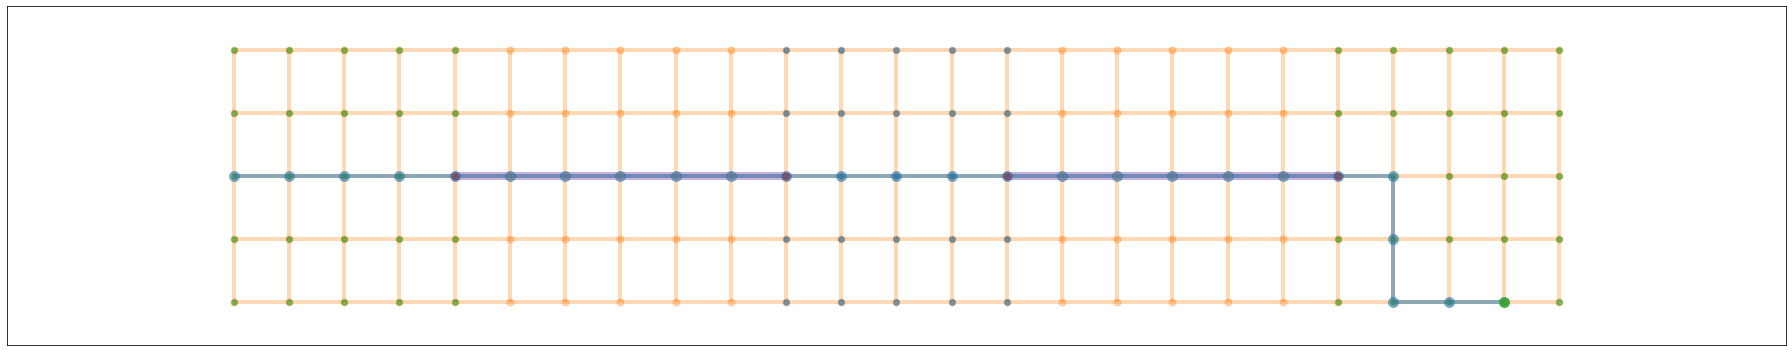

In [55]:
# 这个部分模拟在两个城市中有一条高速公路的场景，A城市想要到 B城市去则必然经过高速公路，
# 在这样的setting下，高速公路一定会成为dictionary中最为重要的一个元素
# 2022年8月30日 拟将三个城市和两个高速公路进行改造，除了使它edge的长度变为真实值，还将两条高速公路变成一个带有收费站的高速公路，中间的城市变成收费站
# 轨迹可以是直接通过高速公路
# 或者是下收费站并结束
# 或者是下了收费站然后重新进入高速公路的第二段
# 首先我们构建初始路网
plt.figure(figsize=(25, 5))
ax = plt.gca()
ax.margins(0.11)
G = nx.grid_2d_graph(matrix_size*5, matrix_size)
pos = dict( (n, n) for n in G.nodes() )
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.3, node_color="tab:orange")
nx.draw_networkx_edges(G, pos, alpha=0.3, width=4, edge_color="tab:orange")
# 画出所有的起点和终点
startpoint_of_highspeedway=[(matrix_size-1,matrix_size//2),(3*matrix_size-1,matrix_size//2)]
endpoint_of_highspeedway=[(matrix_size*2,matrix_size//2),(matrix_size*4,matrix_size//2)]
for i in range(matrix_size):
    for j in range(matrix_size):
        nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i,j)], node_color="tab:green")
        nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i+matrix_size*2,j)], node_color="tab:blue")
        nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i+matrix_size*4,j)], node_color="tab:green")
# 画出高速公路
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[startpoint_of_highspeedway[0]], node_color="tab:red")
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[endpoint_of_highspeedway[0]], node_color="tab:red")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=8, edgelist=[(startpoint_of_highspeedway[0],endpoint_of_highspeedway[0])],edge_color="tab:purple")
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[startpoint_of_highspeedway[1]], node_color="tab:red")
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[endpoint_of_highspeedway[1]], node_color="tab:red")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=8, edgelist=[(startpoint_of_highspeedway[1],endpoint_of_highspeedway[1])],edge_color="tab:purple")


# 开始生成随机轨迹（随机选取起始点和终点，采取最短路径生成路径）
generated_trajectory_dataset_highspeedway=[]
np.random.seed(42)
# for cnt in range(path_num):
for cnt in range(300):
    random_pos = np.random.randint(0, matrix_size, size=6)
    start_point = (random_pos[0], random_pos[1])
    middle_point = (random_pos[2]+matrix_size*2, random_pos[3])
    end_point = (random_pos[4]+matrix_size*4, random_pos[5])
    initial_graph_weight = np.random.randint(3,10,size=(matrix_size*(5*matrix_size-1)+5*matrix_size*(matrix_size-1)))
    cnt = 0
    # 为图上的边赋值权重
    for edge in G.edges():
        G.edges[edge[0],edge[1]]["weight"] = initial_graph_weight[cnt]
        cnt += 1

    
    # tra = next(nx.all_simple_paths(G, source=start_point, target=startpoint_of_highspeedway))
#     for i in range(len(tra)-1):
#         nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:blue")
#         nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
#     nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:blue")  
    
    tra = nx.shortest_path(G, source=start_point, target=startpoint_of_highspeedway[0], weight="weight")
    trajectory=tra
    # print(trajectory)
    trajectory=trajectory+[(5, 2), (6, 2),(7, 2), (8, 2),(9, 2)]
    a=np.random.randint(0, 8)%3
    if (a==0):#这时不停留，直接经过中间小镇/收费站
        trajectory=trajectory+[(5+5, 2), (6+5, 2),(7+5, 2), (8+5, 2),(9+5, 2)]
    if(a==1): #这时停在收费站
        trajectory=trajectory+[(5+5, 2), (6+5, 2),(7+5, 2), (7+5, 3),(7+5, 4)]
        generated_trajectory_dataset_highspeedway.append(trajectory)
        continue
    if(a==2): #这时经过收费站并前往下一个高速路
        trajectory=trajectory+[(5+5, 2), (6+5, 2),(7+5, 2), (7+5, 3),(7+5, 4),(8+5, 4),(8+5, 3),(8+5, 2),(9+5, 2)]

    # tra = nx.shortest_path(G, source=endpoint_of_highspeedway[0], target=middle_point, weight="weight")
    # trajectory=trajectory+tra
    # # print(trajectory)
    # tra = nx.shortest_path(G, source=middle_point, target=startpoint_of_highspeedway[1], weight="weight")
    # trajectory=trajectory+tra
    trajectory=trajectory+[(15, 2), (16, 2),(17, 2), (18, 2),(19, 2)]
    tra = nx.shortest_path(G, source=endpoint_of_highspeedway[1], target=end_point, weight="weight")
    trajectory=trajectory+tra
    generated_trajectory_dataset_highspeedway.append(trajectory)
tra=trajectory
for i in range(len(tra)-1):
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:blue")
    nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:green")

plt.tight_layout()
# plt.axis("off")
plt.show()

In [10]:
ax = plot_tra_new(generated_trajectory_dataset_highspeedway[1],matrix_size,matrix_num=5)
plot_tra_new(generated_trajectory_dataset_highspeedway[2],matrix_size,matrix_num=5,ax_before=ax)

IndexError: list index out of range

c:\tyb_file\tyb_tasks\pathlet\code\utils.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25, 5))


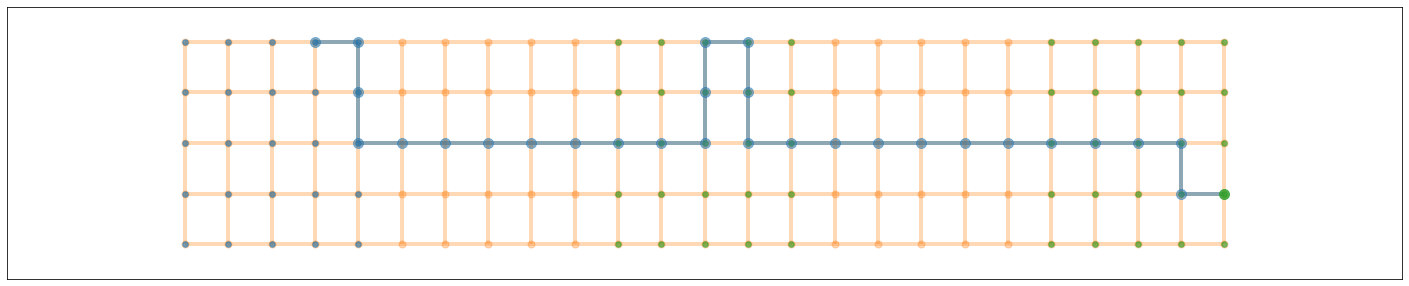

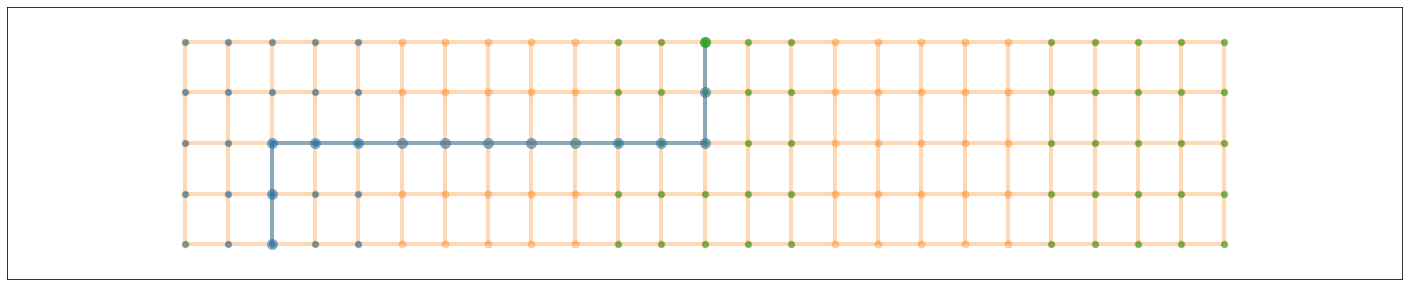

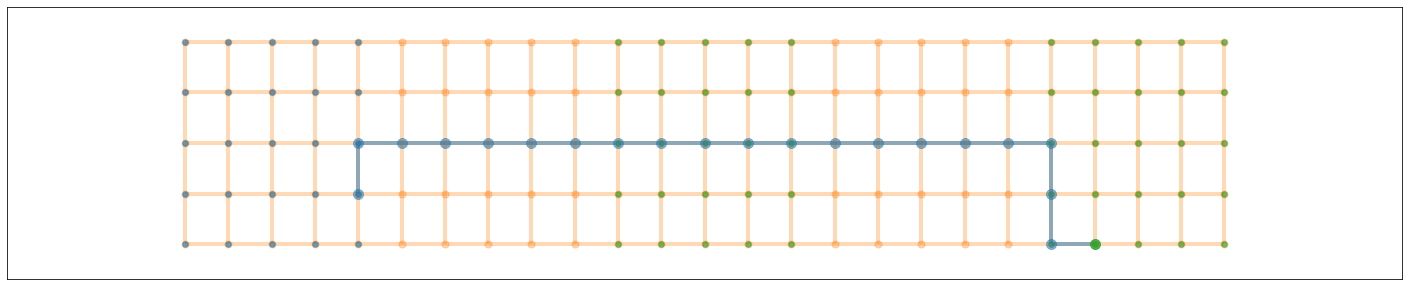

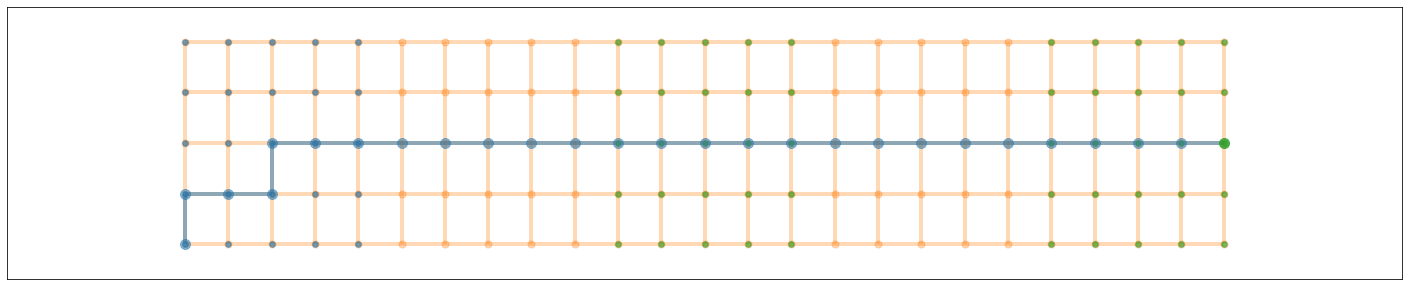

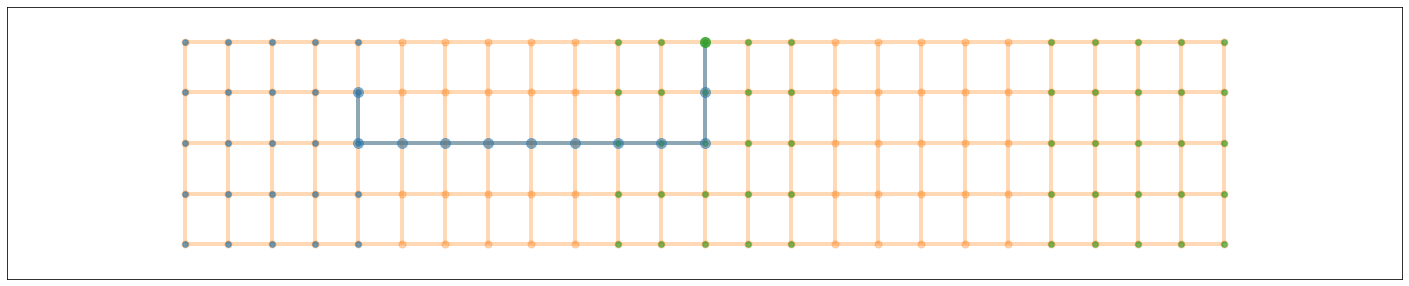

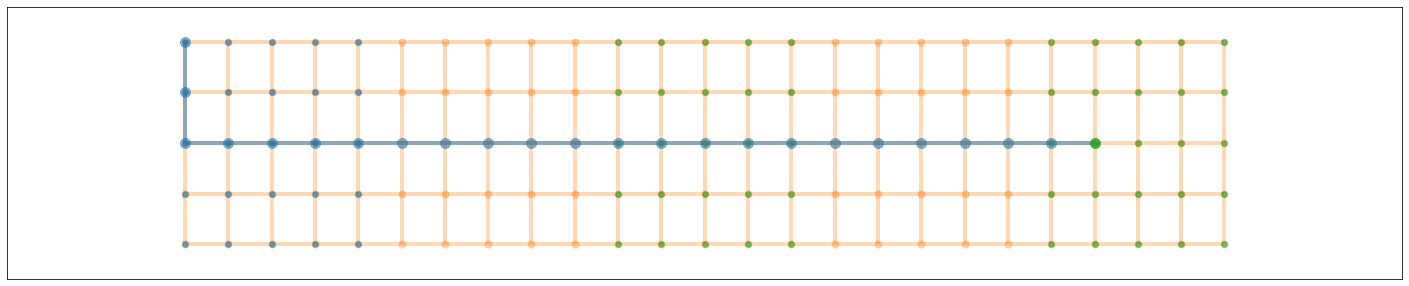

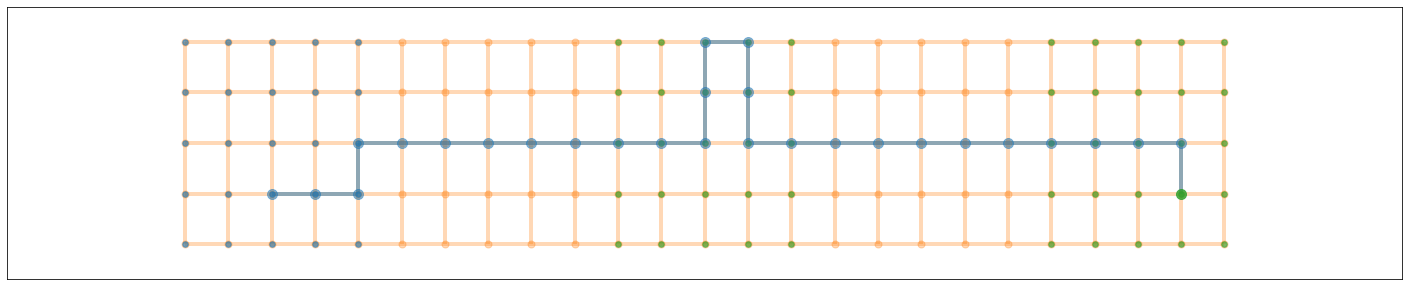

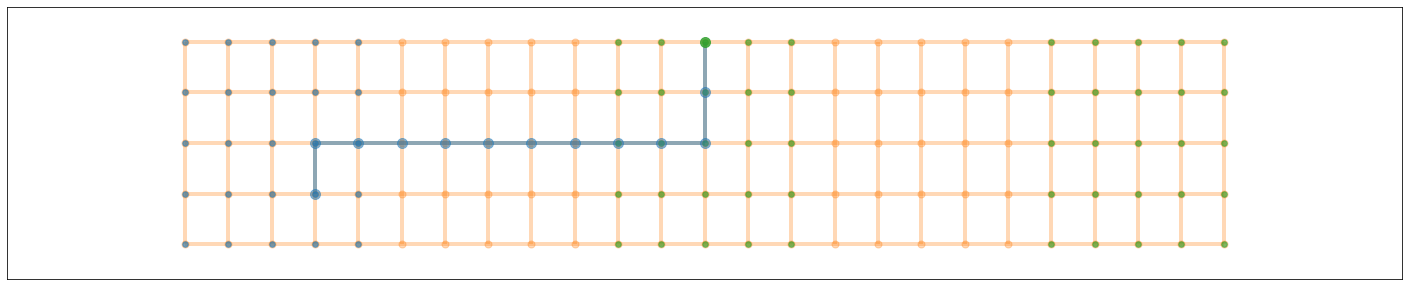

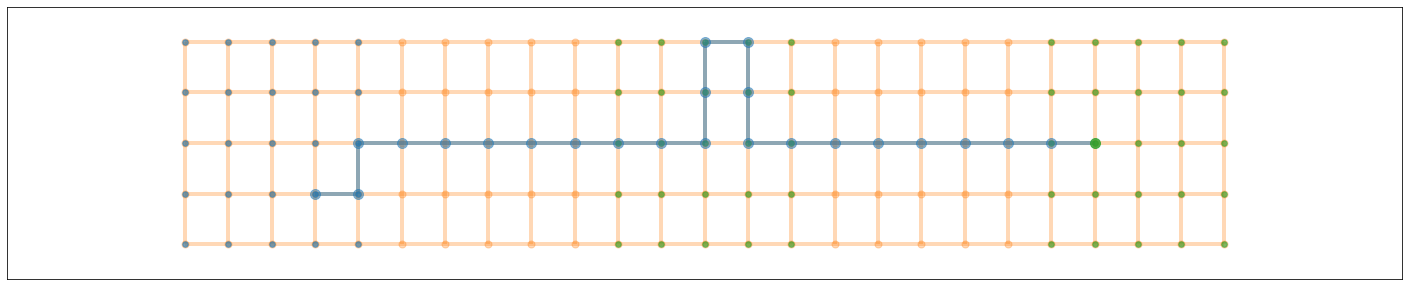

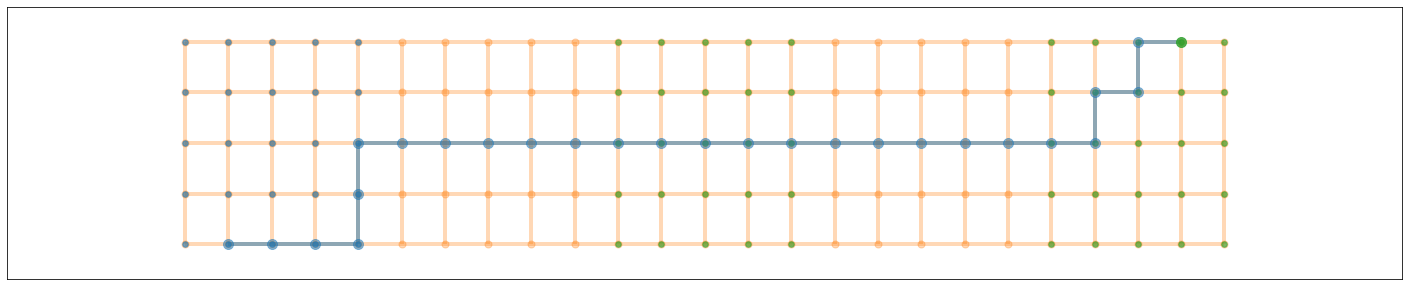

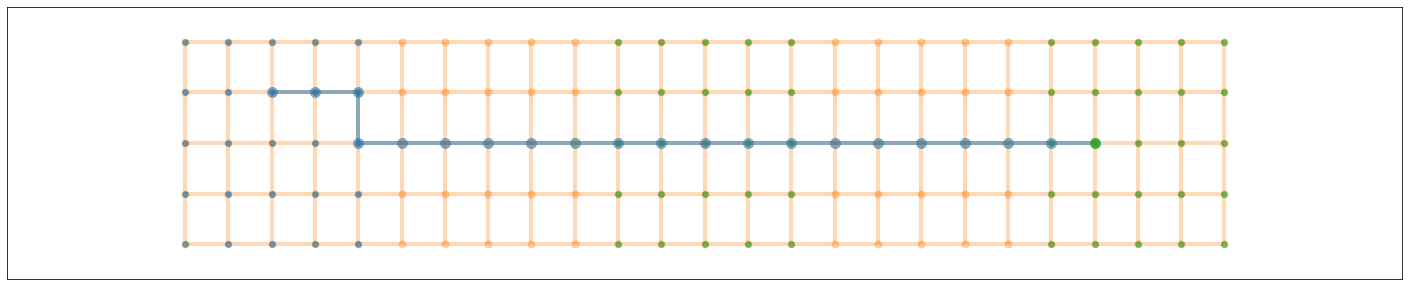

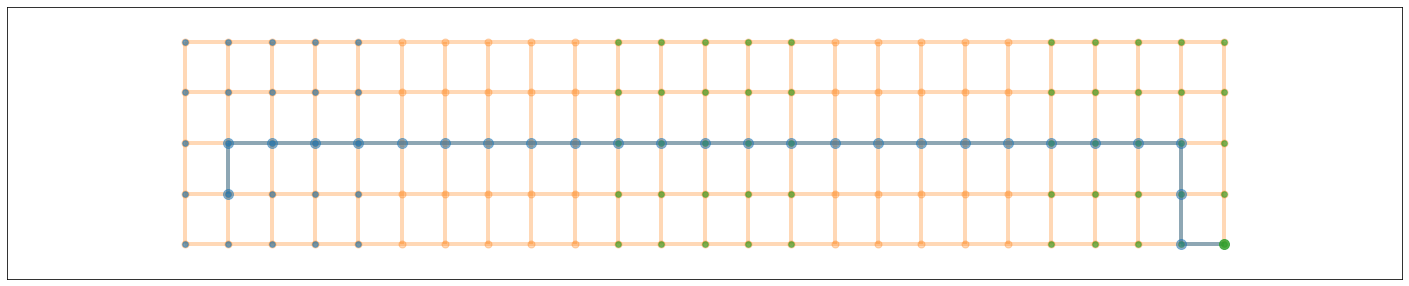

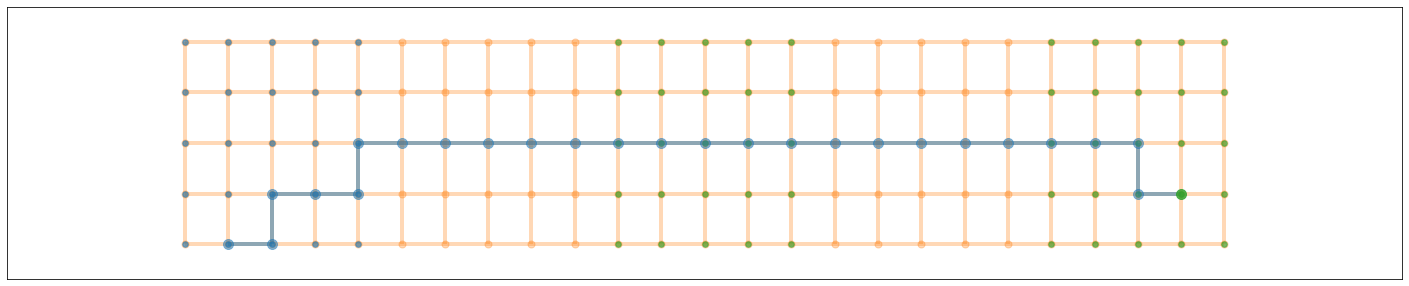

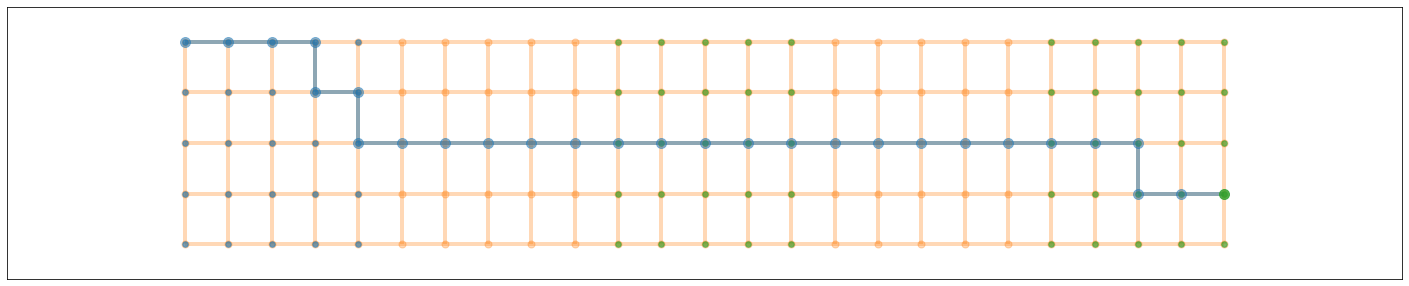

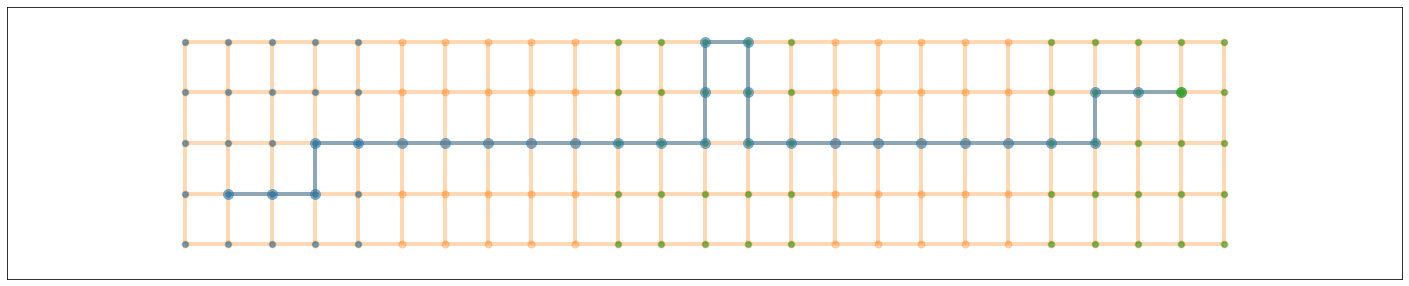

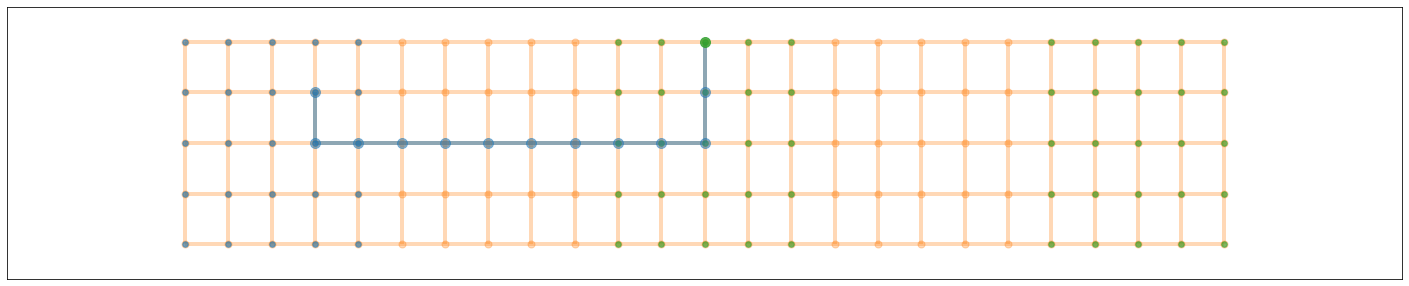

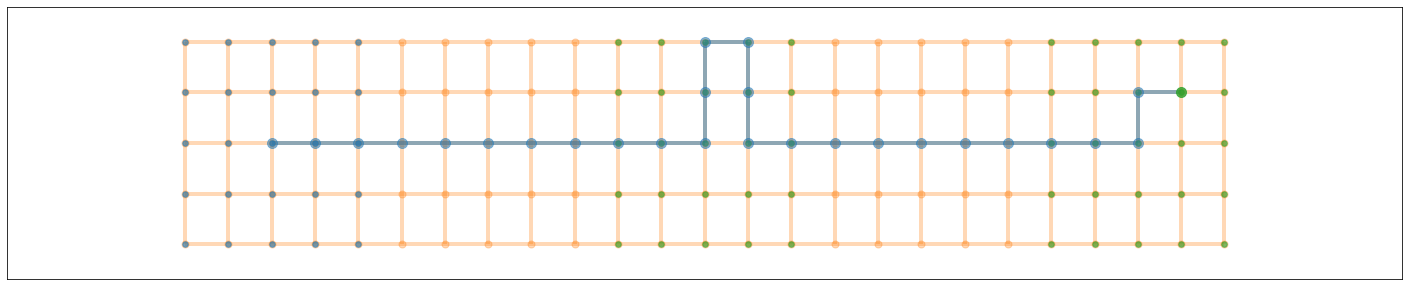

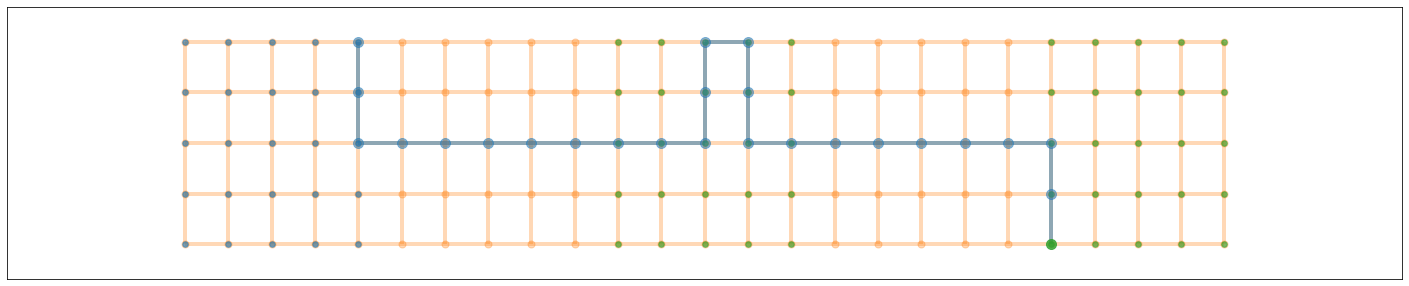

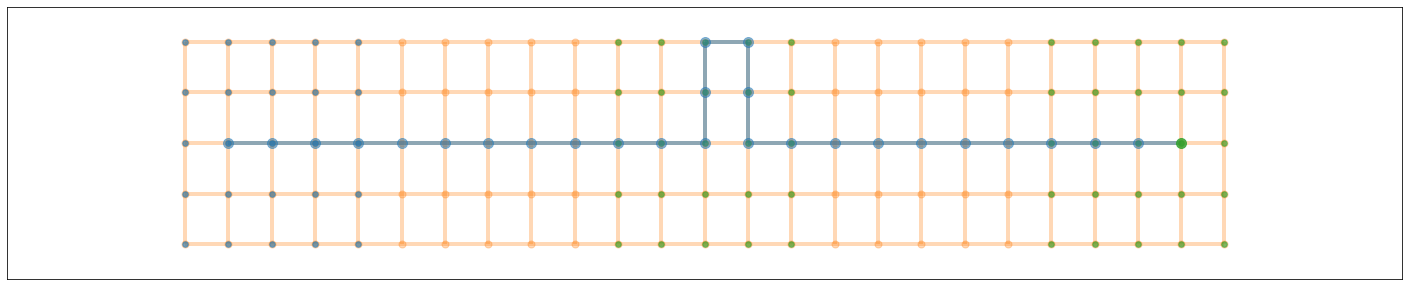

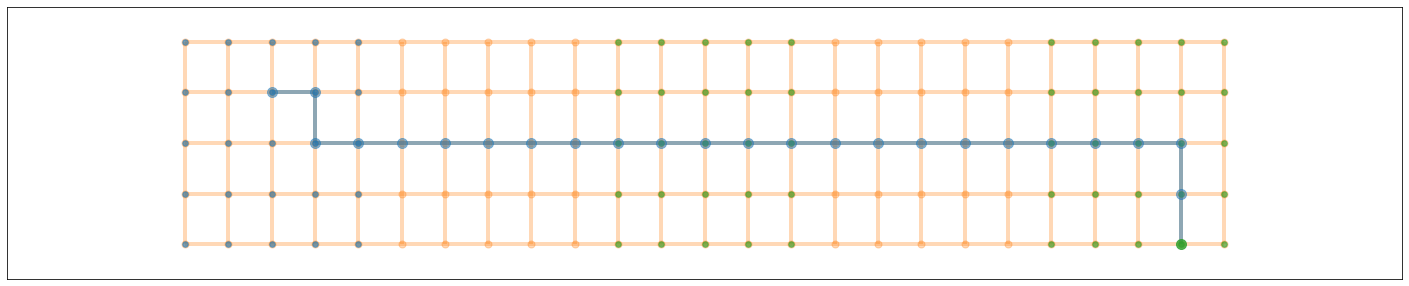

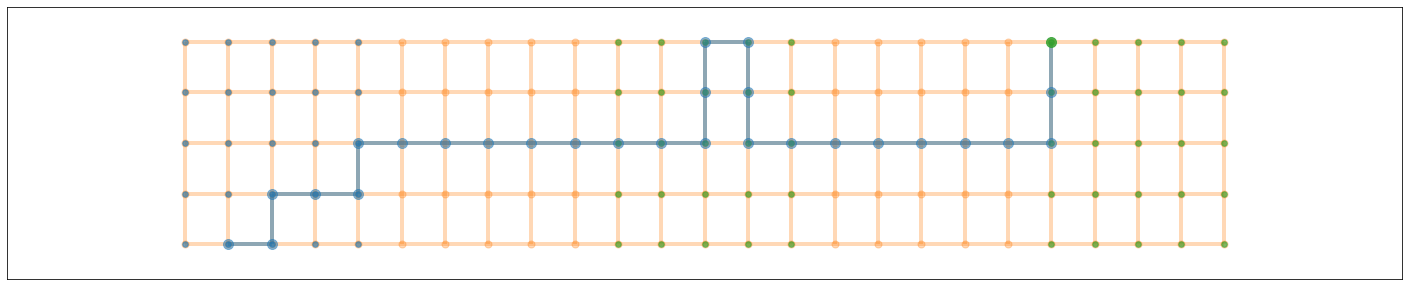

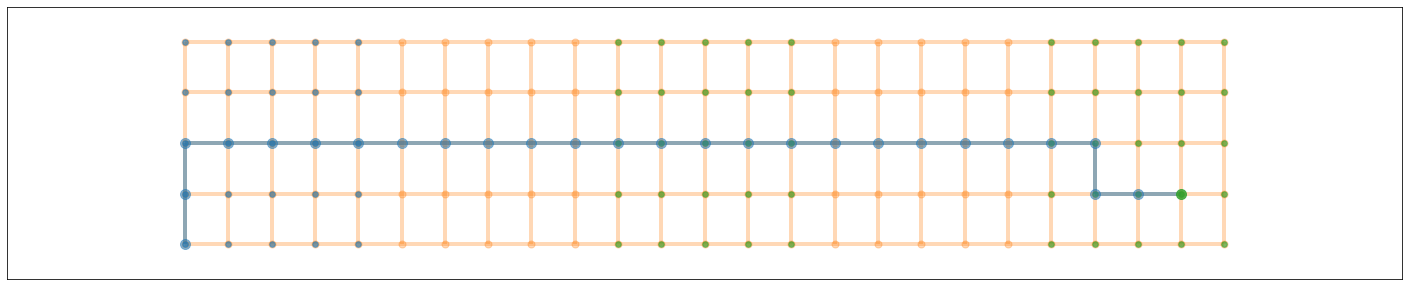

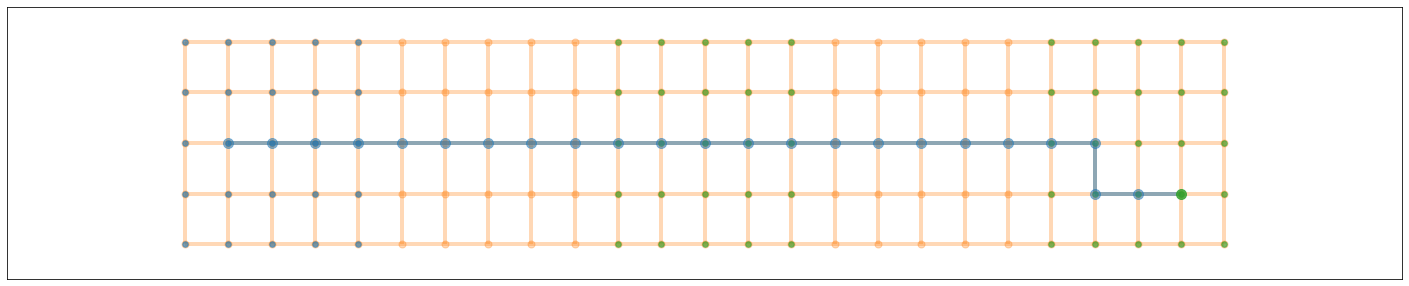

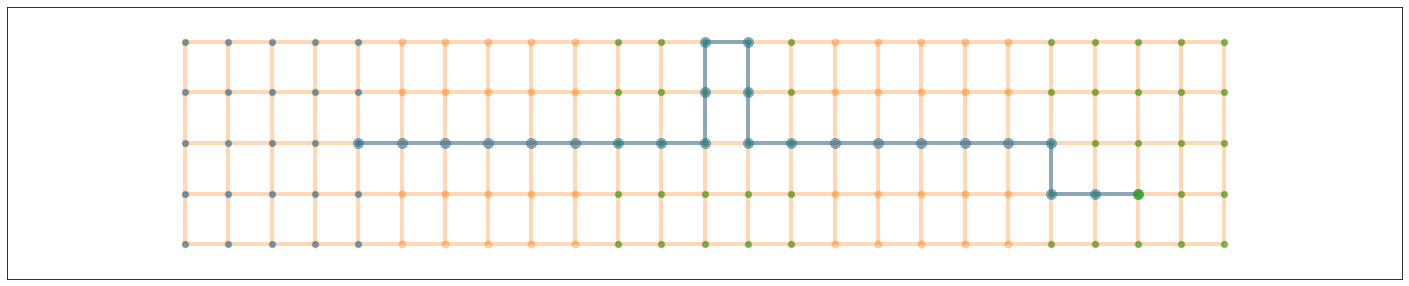

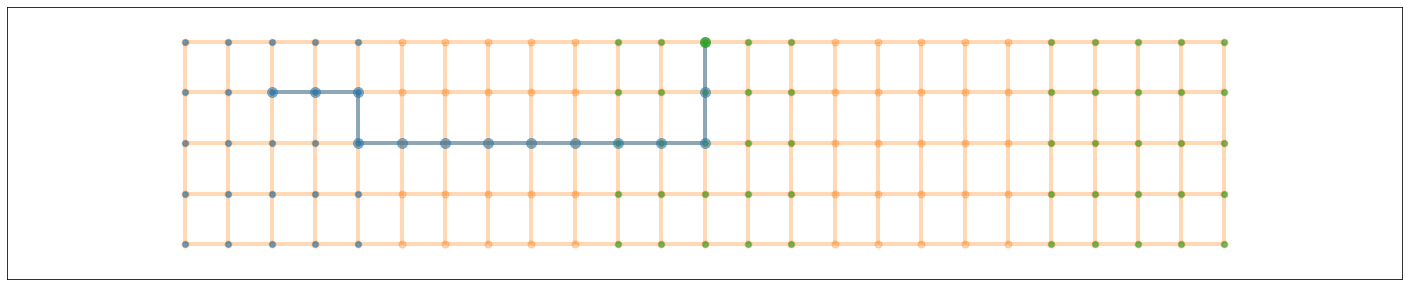

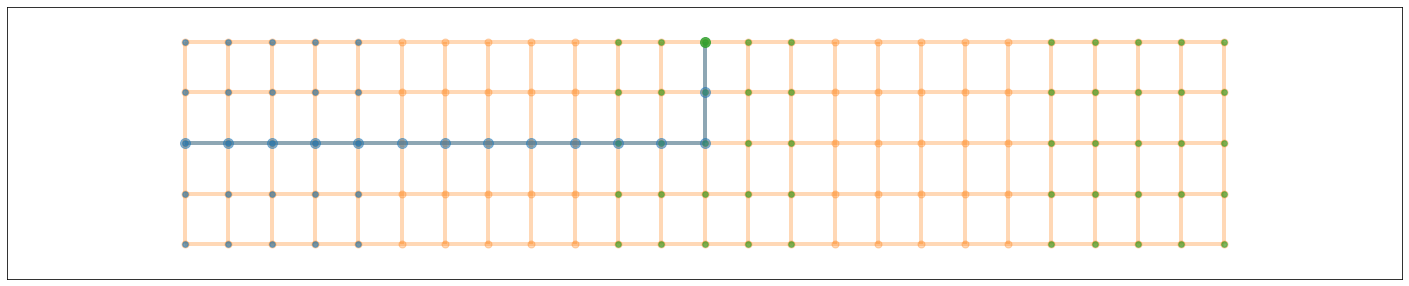

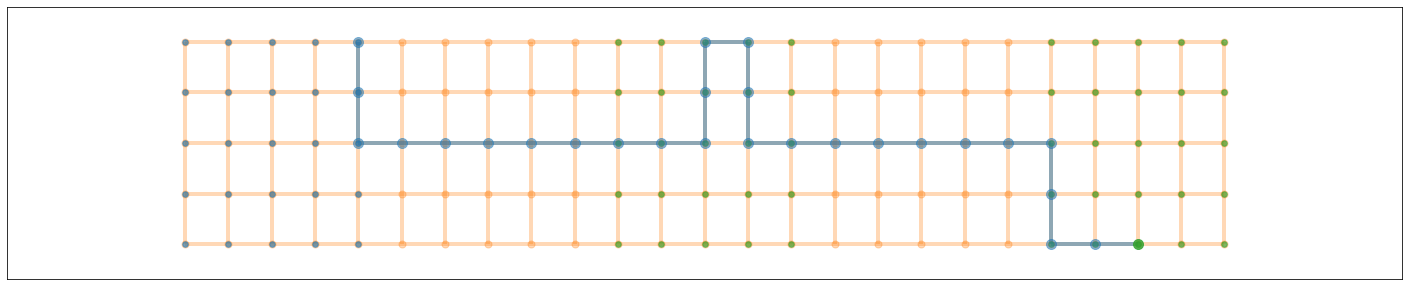

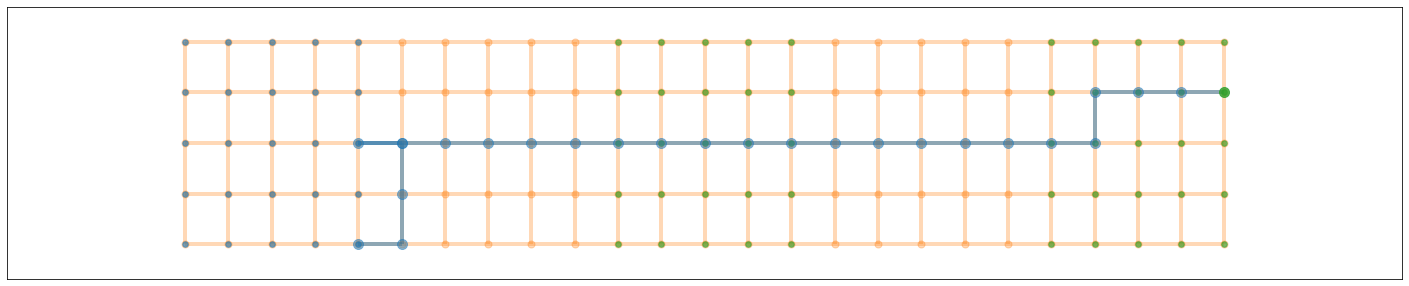

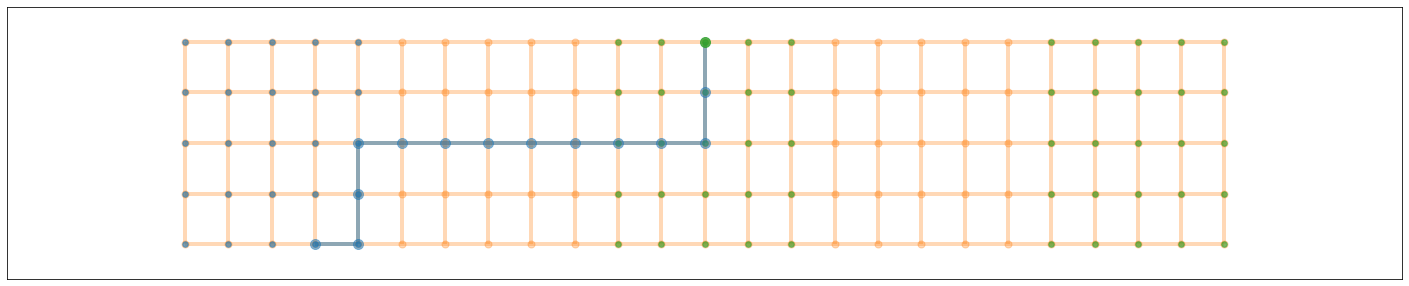

In [57]:
# plot_tra_new(generated_trajectory_dataset_highspeedway[-2],5) 
# generated_trajectory_dataset_highspeedway[-2]

for i in range(0,29):
    plot_tra_new(generated_trajectory_dataset_highspeedway[i],5) 

In [52]:
generated_trajectory_dataset_highspeedway = [[(3,3),(4,3)],[(2,3),(3,3)],[(2,3),(3,3),(4,3)],[(2,3),(3,3),(4,3)]]


In [32]:
# np.random.seed(100)
np.random.randint(0, 10)

8

In [56]:
a=np.array(generated_trajectory_dataset_highspeedway,dtype=object)
np.save('generated_trajectory_dataset_highspeedway20220830.npy',a)   # 保存为.npy格式
    